In [1]:
#Code 2: This file of code deals with supervised learning- classification, and includes the code for LDA, QDA, MNB, DT and Random Forest

import warnings;warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from category_encoders import BinaryEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from mixed_naive_bayes import MixedNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import diamond dataset
diamond_data = pd.read_csv('/Users/saiveephatak/Desktop/OPSM322/Individual project/diamond dataset categorical.csv')
diamond_data.info()
diamond_data_temp = diamond_data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   srno     53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [3]:
#divide the dataset into the features and the labels
diamond_labels = diamond_data['cut'] # Outcome variable
diamond_data.pop('cut')
diamond_data.pop('srno')
diamond_data.head()
diamond_names = diamond_data.columns
diamond_data_dummy = []
encoder = BinaryEncoder()
diamond_final = encoder.fit_transform(diamond_data)

diamond_features = diamond_final.iloc[:,0:20] # Independent variables

In [4]:
#training and testing
X_train, X_test, y_train, y_test = train_test_split(diamond_features, diamond_labels, test_size = 0.20, random_state = 23)


In [5]:
#running LDA
LDAmodel = LinearDiscriminantAnalysis()
LDAmodel.fit(X_train, y_train)
LDApreds = LDAmodel.predict(X_test)
print("Accuracy Linear DA:", accuracy_score(y_test, LDApreds) *100)
#here, on basic run LDA (without grid search, cross validation)= the accuracy is: 60.77122


Accuracy Linear DA: 60.77122728958102


In [6]:
#running grid CV search and cross validation on LDA
estimator_LDA = LinearDiscriminantAnalysis()
parameters_LDA = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto']
}

grid_search_LDA = GridSearchCV(estimator=estimator_LDA, param_grid=parameters_LDA, scoring='accuracy', n_jobs=-1, cv=5)
LDAGridSearch = grid_search_LDA.fit(X_train, y_train)
print(grid_search_LDA.best_params_ ) 
bp = grid_search_LDA.best_params_

solver_n = bp['solver']
shr = bp['shrinkage']

BestLDAmodel =LinearDiscriminantAnalysis(solver = solver_n, shrinkage = shr)
scores = cross_val_score(BestLDAmodel, X_train, y_train)
print(scores*100)
scores.mean()*100
scores.std()*100

cv_results = cross_validate(BestLDAmodel, X_train, y_train, cv=5, return_estimator=True)
t_lda = cv_results['test_score']
best_id = np.argmax(t_lda)
best_lda = cv_results['estimator'][best_id]
BestLDApreds = best_lda.predict(X_test)
print("Accuracy Best LDA on retrained parameters:", accuracy_score(y_test, BestLDApreds) *100)


/Users/saiveephatak/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/saiveephatak/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/saiveephatak/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/saiveephatak/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 621,

{'shrinkage': None, 'solver': 'svd'}
[62.97068706 60.44490789 61.91193511 60.77636153 60.8806489 ]
Accuracy Best LDA on retrained parameters: 61.744530960326294


In [7]:
#here, the best parameters are the following: 'shrinkage': None, 'solver': 'svd'
#The accuracy after running the best LDA Model on the retrained parameters = 61.7445
#We can see an improvement from the original LDA model (even though it is not a big improvement), showing that the grid search for best parameters was infact helpful in tuning the model

In [8]:
#running QDA
QDAmodel = QuadraticDiscriminantAnalysis()
QDAmodel.fit(X_train, y_train)
QDApreds = QDAmodel.predict(X_test)
print("Accuracy  QDA:", accuracy_score(y_test, QDApreds) *100)
#here, on basic run QDA (without grid search, cross validation) the accuracy is: 57.8605


Accuracy  QDA: 57.8605858361142


In [9]:
#running grid CV search and cross validation on QDA
estimator_QDA = QuadraticDiscriminantAnalysis()
parameters_QDA = {
    'reg_param': [0.0, 0.1, 0.2, 0.3],
    'store_covariance': [True, False],  
    'tol': [1e-3, 1e-4, 1e-5]
}

grid_search_QDA = GridSearchCV(estimator=estimator_QDA, param_grid=parameters_QDA, scoring='accuracy', n_jobs=-1, cv=5)
QDAGridSearch = grid_search_QDA.fit(X_train, y_train)
print(grid_search_QDA.best_params_ ) 
bp = grid_search_QDA.best_params_

rparam = bp['reg_param']
stc = bp['store_covariance']
tol_n = bp['tol']

BestQDAmodel =QuadraticDiscriminantAnalysis(reg_param=rparam, store_covariance=stc, tol=tol_n)

scores = cross_val_score(BestQDAmodel, X_train, y_train)
print(scores*100)
scores.mean()*100
scores.std()*100

cv_results = cross_validate(BestQDAmodel, X_train, y_train, cv=5, return_estimator=True)
t_qda = cv_results['test_score']
best_id = np.argmax(t_qda)
best_qda = cv_results['estimator'][best_id]
BestQDApreds = best_qda.predict(X_test)
print("Accuracy Best QDA on retrained parameters:", accuracy_score(y_test, BestQDApreds) *100)


{'reg_param': 0.3, 'store_covariance': True, 'tol': 0.001}
[65.41536323 64.43054107 63.40672074 63.97450753 62.7230591 ]
Accuracy Best QDA on retrained parameters: 64.71078976640712


In [10]:
#here, the best parameters are the following: 'reg_param': 0.3, 'store_covariance': True, 'tol': 0.001
#The accuracy after running the best QDA Model on the retrained parameters = 64.7107 
#We can see a big improvement from the original QDA model showing that the grid search for best parameters was infact quite helpful in tuning and finding the best model for QDA.


In [11]:
#running MNB
#For the purpose of MNB, I am not making my categorical variables in dummies.
diamond_data_temp.pop('srno')
label_encoder = LabelEncoder()
diamond_data_temp['clarity'] = label_encoder.fit_transform(diamond_data_temp['clarity']).astype(int)
diamond_data_temp['color'] = label_encoder.fit_transform(diamond_data_temp['color']).astype(int)
diamond_data_temp['cut'] = label_encoder.fit_transform(diamond_data_temp['cut']).astype(int)
diamond_label_mnb = diamond_data_temp['cut']
diamond_data_temp.pop('cut')

X_train1, X_test1, y_train1, y_test1 = train_test_split(diamond_data_temp, diamond_label_mnb, test_size = 0.20, random_state = 23)


In [12]:
MNBmodel = MixedNB(categorical_features=[1,2])
MNBmodel.fit(X_train1, y_train1)
MNBpreds = MNBmodel.predict(X_test1)
print("Accuracy  Mixed NB:", accuracy_score(y_test1, MNBpreds) *100)
#here, on basic run MNB (without grid search, cross validation) the accuracy is: 57.3785

Accuracy  Mixed NB: 57.37856878012607


In [13]:
#I could not find workable parameters for Grid CV search, hence I am directly doing cross validation
cv_results_mnb = cross_validate(MNBmodel, X_train1, y_train1, cv=20, return_estimator=True)
t_mnb = cv_results_mnb['test_score']
best_id_mnb = np.argmax(t_mnb)
BestMNBmodel = cv_results_mnb['estimator'][best_id_mnb]
MNBpreds = BestMNBmodel.predict(X_test1)
print("Best accuracy MNB after CV:", accuracy_score(y_test1, MNBpreds) *100)

/Users/saiveephatak/opt/anaconda3/lib/python3.9/site-packages/mixed_naive_bayes/mixed_naive_bayes.py:275: RuntimeWarning: invalid value encountered in divide
  normalised = finals/finals.sum(axis=1, keepdims=True)


Best accuracy MNB after CV: 57.489803485354095


In [14]:
#Here, the best accuracy after running cross validation only slightly increased to 57.4898. The MNB model seems to not be a suitable one for this particular dataset.

In [15]:
#running decision tree
DTclassifier = DecisionTreeClassifier()
DTmodel = DTclassifier.fit(X_train, y_train)
DTpred = DTclassifier.predict(X_test)
print("Accuracy DT:", accuracy_score(y_test, DTpred) *100)
#here, on basic run DT (without grid search, cross validation) the accuracy is: 70.9306

Accuracy DT: 70.93066370040786


In [16]:
estimator_DT = DecisionTreeClassifier()
nn_list=list(range(5,50))
print(nn_list)
parameters_DT = {
    'max_depth': nn_list,  # Example parameter, replace with appropriate decision tree parameters
    'min_samples_split': [10,20,50],
    'min_samples_leaf': [10, 20, 50],
    'criterion': ['gini', 'entropy']
}
grid_search_DT = GridSearchCV(estimator=estimator_DT, param_grid=parameters_DT, scoring='accuracy', n_jobs=-1, cv=3)
DTGridSearch = grid_search_DT.fit(X_train, y_train)

#Print best parameter values
print(grid_search_DT.best_params_ ) 
bp = grid_search_DT.best_params_

md = bp['max_depth']
mss = bp['min_samples_split']
msl = bp['min_samples_leaf']
c = bp['criterion']

BestDTmodel = DecisionTreeClassifier(max_depth=md, min_samples_split=mss, min_samples_leaf=msl, criterion=c) 

scores = cross_val_score(BestDTmodel, X_train, y_train)
print(scores*100)
scores.mean()*100
scores.std()*100

cv_results = cross_validate(BestDTmodel, X_train, y_train, cv=5, return_estimator=True)
t_dt = cv_results['test_score']
best_id = np.argmax(t_dt)
best_dt = cv_results['estimator'][best_id]
BestDTpreds = best_dt.predict(X_test)
print("Accuracy Best DT on retrained parameters:", accuracy_score(y_test, BestDTpreds) *100)


[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
{'criterion': 'gini', 'max_depth': 33, 'min_samples_leaf': 20, 'min_samples_split': 50}
[76.96674777 75.94716719 77.12630359 75.66628042 76.25724218]
Accuracy Best DT on retrained parameters: 76.60363366703746


In [17]:
#here, the best parameters are the following: 'criterion': 'gini', 'max_depth': 33, 'min_samples_leaf': 20, 'min_samples_split': 50
#The accuracy after running the best Decision Tree Model on the retrained parameters = 76.6036
#We can see a big improvement from the original Decision Tree model showing that the grid search for best parameters was infact quite helpful in tuning and finding the best model. This model also has one of the highest accuracies for the dataset, and seems to be the best fitting one.


In [18]:
#running Random Forest Classifier
RFModel = RandomForestClassifier(n_estimators=100, random_state=42)
RFModel.fit(X_train, y_train)
RFpreds = RFModel.predict(X_test)
print("Accuracy Random Forest:", accuracy_score(y_test, RFpreds) *100)
#here, on basic run RF (without grid search, cross validation) the accuracy is: 76.6499


Accuracy Random Forest: 76.64998146088247


In [19]:
#cannot run Grid Search due to capacity of laptop
cv_results = cross_validate(RFModel, X_train, y_train, cv=5, return_estimator=True)
t_rf = cv_results['test_score']
best_id = np.argmax(t_rf)
best_rf = cv_results['estimator'][best_id]
BestRFpreds = best_rf.predict(X_test)
print("Best RF Model result:", cv_results['test_score'][best_id]*100)
print("Accuracy RF:", accuracy_score(y_test, BestRFpreds) *100)

Best RF Model result: 77.51129648939869
Accuracy RF: 76.58509454949944


In [20]:
#The best cross validation score for random forest model is: 76.5850 
#Here, the cross validated model for random forest decreased slightly from the original model. This could be to accomodate for generalisabilty of the dataset. 
#regardless, the random forest model is perhaps one of the best models to apply on this dataset. 

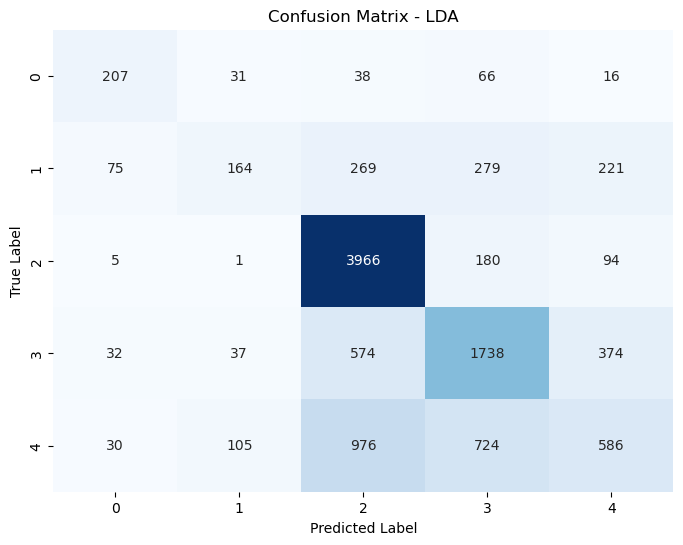

F1 Score - LDA: 57.77052361164727


In [21]:
#comparing all the models based on their confusion matrix and their F1 scores

#LDA Confusion matrix and F1 score
y_true = y_test
y_pred = BestLDApreds

#Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LDA")
plt.show()

#F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 Score - LDA:", f1*100)

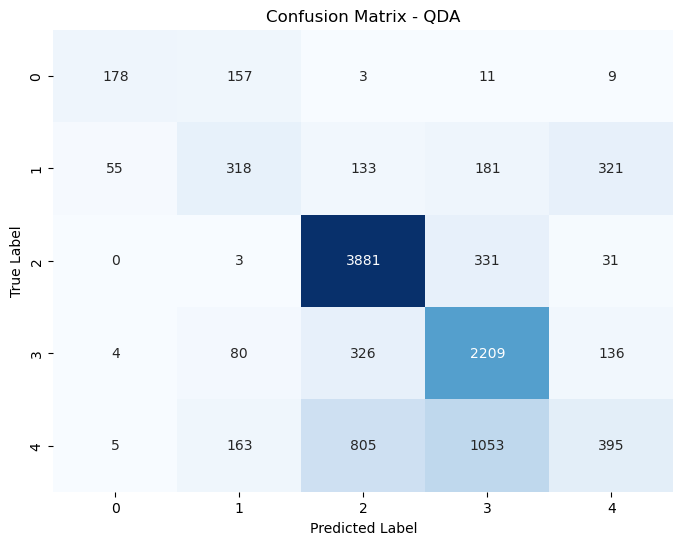

F1 Score - QDA: 60.52973633526069


In [23]:

#QDA Confusion matrix and F1 score
y_true = y_test
y_pred = BestQDApreds
#Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - QDA")
plt.show()
#F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 Score - QDA:", f1*100)

#cannot run confusion matrix and F1 score on MNB, since it is a mixed dataset of numeric and categorical variables

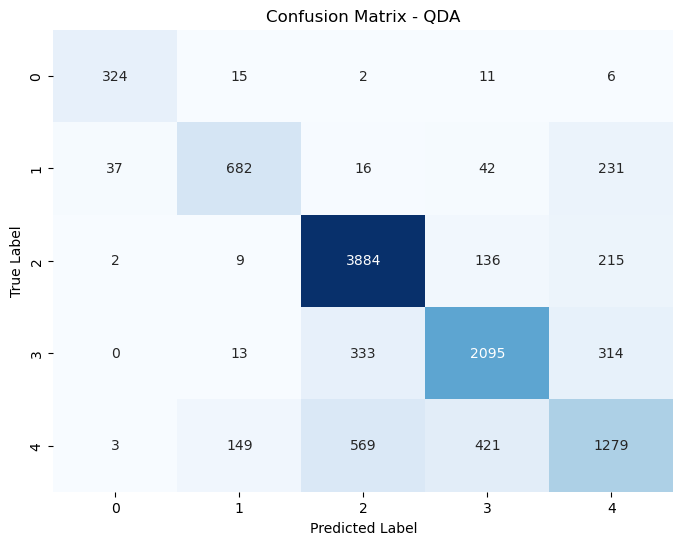

F1 Score - DT: 75.99836828842044


In [24]:
#Decision Tree Confusion matrix and F1 score
y_true = y_test
y_pred = BestDTpreds
#Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - QDA")
plt.show()
#F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 Score - DT:", f1*100)

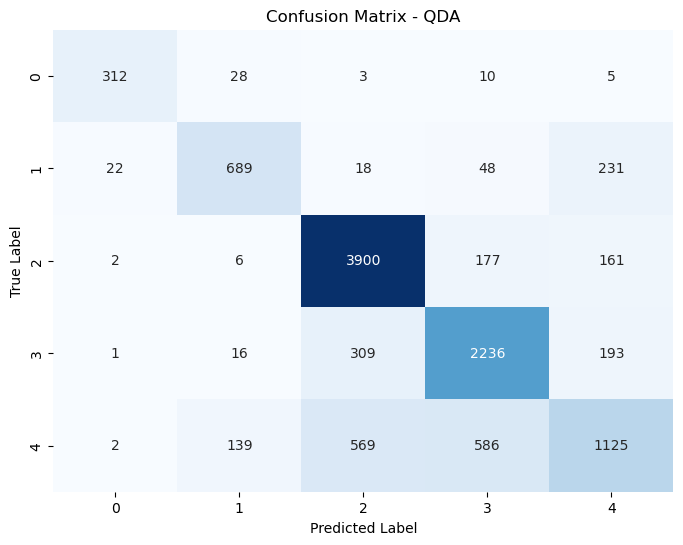

F1 Score - RF: 75.59699187634227


In [25]:
#random forest Confusion matrix and F1 score
y_true = y_test
y_pred = BestRFpreds
#Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - QDA")
plt.show()
#F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 Score - RF:", f1*100)

In [26]:
#Comparing all the models together
#The decision tree and random forest models are the best models to apply to this dataset. 
#For decision tree, the accuracy is 76.6036 and the F1 score is 75.9983.
#For random forest, the accuracy is 76.5850 and the F1 score is 75.5969.
#Here, we can see that the decision tree is marginally better than the random forest. However, since I could not run the best parameter Grid CV search on Random Forest due to computational limitations, I feel like there is definitely scope for improvement in the random forest model.
#As of now, I would be comfortable using either of the models (DT and RF) on this particular dataset.
#The LDA and QDA did not provide very high scores.
#For LDA, the accuracy is 61.7445 and the F1 score is 57.7705.
#For QDA, the accuracy is 64.7107 and the F1 score is 60.5297.
#The LDA model performs the worst out of all models. This might be attributed to the fact that the data is not normally distributed. Regardless, here neither LDA nor QDA are able to give a good model, which means that Random Forest/decision tree is the best choice in this case.